In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False
from PIL import Image

In [206]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


from sklearn.datasets import load_iris

In [163]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default") # 경고문 다시 뜨도록

# 1. KNN
- K-Nearest Neighbors
- 이해하기 쉽고 직관적인 모델
- 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
- 훈련셋이 너무 크면 예측이 느려진다.
- Hyper Parameter
    - 이웃의 갯수(k), k는 홀수
    - 거리를 계산(p값 1or 2)
- https://subinium.github.io/MLwithPython-2-3-1/

## (1) 동작 원리

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


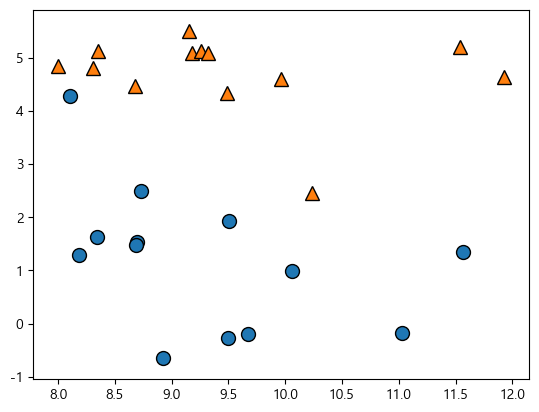

In [3]:
X, y= mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


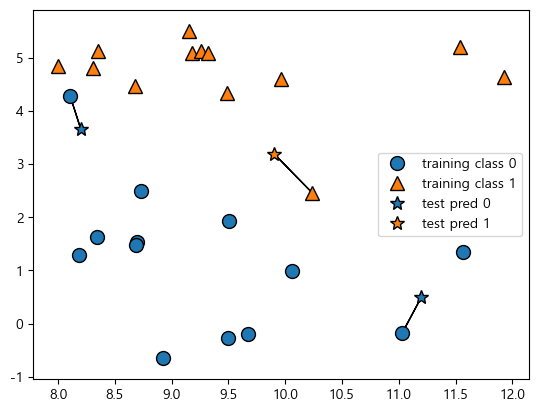

In [4]:
mglearn.plots.plot_knn_classification()
# 새로 입력될 값이 가장 가까운 값에 의해 결정된다
# 가장 간단한 k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트를 최근접 이웃으로 찾아 예측에 사용합니다.
# 단순히 이 훈련 데이터 포인트의 출력이 예측됩니다.
# 말이 어려워보이지만 단순하게 가장 가까운 포인트를 보고 클래스를 분류하는 것입니다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


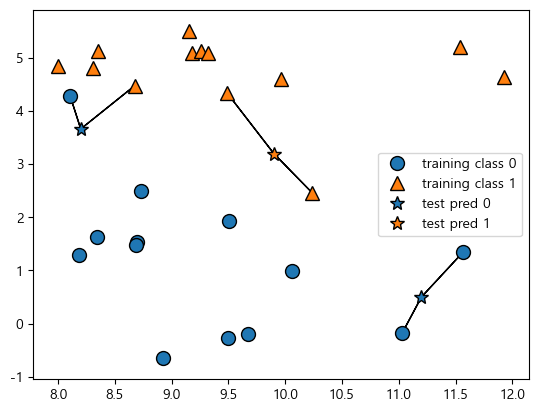

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=2)
# 짝수개로는 하지 않는다
# 연결된 이웃이 2개이므로 분류하기 힘들다

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


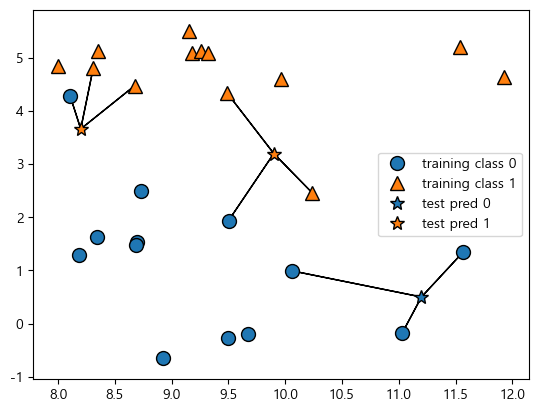

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 3개중 2개로 연결된 것으로 분류한다

# 2. 거리 측정 방식 ( norm)
- 머신 러닝에서 측정(measure)은 보통 거리(distance)가 많이 사용 됨
- norm : 크기의 일반화로 벡터의 크기(혹은 길이)를 측정하는 방법입니다. 두 벡터 사이의 거리를 측정하는 방법
- 여기서 p는 Norm의 차수를 의미. p = 1이면 L1 Norm. p = 2이면 L2 Norm. n은 해당 벡터의 원소 수
- https://hwanii-with.tistory.com/58

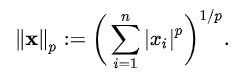

In [7]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/norm.png')
image

## (1) L1 norm
    단순한 거리의 절대값의 합 (양수로만 구할 수 있음)
    맨하탄 거리: 맨하튼에 빌딩이 많기 때문에 대각선으로 가로질러서 갈 수 없음. 돌아서 가는 거리를 측정
    L1 norm은 벡터의 원소들의 절대값을 모두 더한 값으로 벡터의 크기를 나타내며, 각 원소의 크기가 중요한 경우에 사용
    ||x||₁ = |x₁| + |x₂| + ... + |xₙ|
- L1 Regularization
- Computer Vision

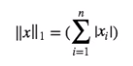

In [8]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/norm1.png')
image

## (2) L2 norm
    가장 빨리 갈 수 있는 거리
    피타고라스의 정리, 유클리드 거리
    L2 norm은 벡터의 각 원소를 제곱하여 더한 후, 제곱근을 취한 값으로 벡터의 크기를 나타내며, 
    원소의 크기 및 방향이 모두 중요한 경우에 사용
    ||x||₂ = √(x₁² + x₂² + ... + xₙ²)
- L2 Regularization
- KNN 알고리즘
- kmean 알고리즘

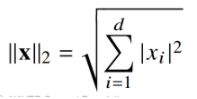

In [9]:
image = Image.open('C:/kimhotak13/PythonWork/AI/data/norm2.png')
image

### 1) 사용 예1

In [10]:
df = pd.DataFrame(np.random.randint(1,10,(3,2)))
df.columns = ["x", "y"]
df

,x,y
0,6,2
1,5,6
2,8,7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 7.25)

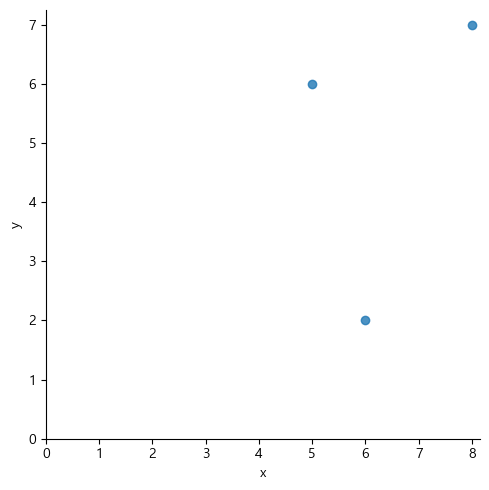

In [11]:
plot = sns.lmplot("x", "y", data = df, fit_reg = False)
plot.axes[0, 0].set_xlim(0)
plot.axes[0, 0].set_ylim(0)

In [12]:
# (0, 0)으로부터 어디가 제일 가까울까?
# norm 계산하는 방법
# ord = p값
np.linalg.norm(df.values, ord=2, axis=1)
# 가장 낮은 값이 가장 가까운 값(값의 순서는 인덱스 순서)

array([ 6.32455532,  7.81024968, 10.63014581])

### 2) 사용 예2

In [13]:
df = pd.DataFrame(np.random.randint(-3, 3, (3, 3)))
df.columns = ["move1", "move2", "move3"]
df

,move1,move2,move3
0,0,-3,-2
1,1,-1,1
2,2,1,-3


In [14]:
# 3명이 3번의 주사위를 던져서 걸음수를 측정했을 때, 누가 제일 많이 걸었을까?
np.linalg.norm(df.values, ord=1, axis=1)

array([5., 3., 6.])

# 3. KNN 구현

In [4]:
X, y = mglearn.datasets.make_forge()
print(X.shape)

(26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))

19 7 19 7


In [6]:
# 이웃의 갯수와 p값에 따라 값이 조금씩 변동된다
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

# 훈련은 0.9473684210526315
# 시험은 0.8571428571428571
# 훈련에 강하다 = 훈련에 fit되어 있다
# 중요한 것은 test의 점수가 높은게 낫다
# 가장 좋은 것은 훈련과 test의 차이가 거의 없어야한다
# 과적합

0.9473684210526315
0.8571428571428571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [8]:
clf = KNeighborsClassifier(n_neighbors=1, p=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [9]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.8571428571428571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [10]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# 차이가 줄었다

0.8947368421052632
0.8571428571428571


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [11]:
clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0, 1, 0, 0])

In [12]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

## (1) 성능 분석에 대한 시각화

Text(0.5, 1.0, '9개의 이웃')

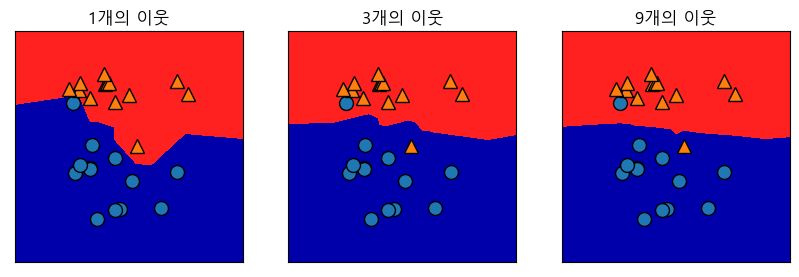

In [24]:
_, axes = plt.subplots(1, 3, figsize=(10, 3))
axes

clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
mglearn.plots.plot_2d_separator(clf, X, ax=axes[0], fill=True)
axes[0].set_title("1개의 이웃")

clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])
mglearn.plots.plot_2d_separator(clf, X, ax=axes[1], fill=True)
axes[1].set_title("3개의 이웃")

clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[2])
mglearn.plots.plot_2d_separator(clf, X, ax=axes[2], fill=True)
axes[2].set_title("9개의 이웃")

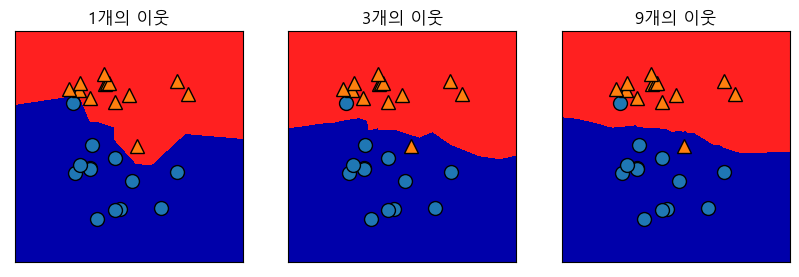

In [25]:
_, axes = plt.subplots(1, 3, figsize=(10, 3))
axes

for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, fill=True)
    ax.set_title("{}개의 이웃".format(n))

# 과적화의 반대말 = 일반화
# 이웃의 수가 적을수록 복잡해진다 = 과적합이 심해진다
# 이웃의 수가 많을수록 단순해진다,완만해진다 = 테스트와 시험의 차이가 심해진다

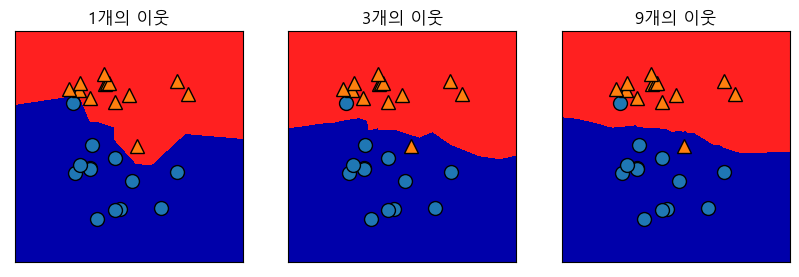

In [26]:
_, axes = plt.subplots(1, 3, figsize=(10, 3))
axes

for i in range(3):

    clf = KNeighborsClassifier(n_neighbors=3**i).fit(X, y)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[i])
    mglearn.plots.plot_2d_separator(clf, X, ax=axes[i], fill=True)
    axes[i].set_title(f"{3**i}개의 이웃")

## (2) 유방암 데이터셋

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [14]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [15]:
cancer = pd.read_csv("data/data_classification_cancer.csv")
cancer.head()
cancer.info()
cancer.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
X = cancer[cancer.columns[:-1]]
y = cancer[cancer.columns[[-1]]]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
y

,class
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant
...,...
564,malignant
565,malignant
566,malignant
567,malignant


In [38]:
y.value_counts()

class    
benign       357
malignant    212
dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

398 171 398 171


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)
print(len(X_train), len(X_test), len(y_train), len(y_test))


398 171 398 171


In [41]:
print(y_train.value_counts() / len(y_train)) # stratify=y일때 더 차이가 없다
print(y_test.value_counts() / len(y_test)) # 더 골고루 섞였다

class    
benign       0.628141
malignant    0.371859
dtype: float64
class    
benign       0.625731
malignant    0.374269
dtype: float64


### 1) 정규화를 하지 않았을 때

In [42]:
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
# 회귀에서는 평가가 맞음 score()
# 알고리즘이 분류이기 때문에, score는 평가가 아님
# 분류에서는 정확하게 값을 맞췄는가? 정답의 갯수
# train과 test에서 차이가 조금이라도 있다면 과적합이다 = 줄일수록 작을수록 좋다

0.9422110552763819
0.9298245614035088


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [44]:
import mglearn

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### 2) 정규화를 했을 때

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)

In [46]:
clf2 = KNeighborsClassifier(n_neighbors=5).fit(X_train_normed, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
print(clf.score(X_train_normed, y_train))
print(clf.score(X_test_normed, y_test))

0.628140703517588
0.6257309941520468


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:22

### 3) 가장 적합한 파라미터 선정

In [48]:
train_acc = []
test_acc = []

for n in range(1, 21, 2):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

In [49]:
print(train_acc)
print(test_acc)

[1.0, 0.964824120603015, 0.9422110552763819, 0.9447236180904522, 0.9346733668341709, 0.9271356783919598, 0.9271356783919598, 0.9246231155778895, 0.9271356783919598, 0.9271356783919598]
[0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.935672514619883, 0.935672514619883, 0.9415204678362573, 0.935672514619883, 0.9298245614035088, 0.9239766081871345]


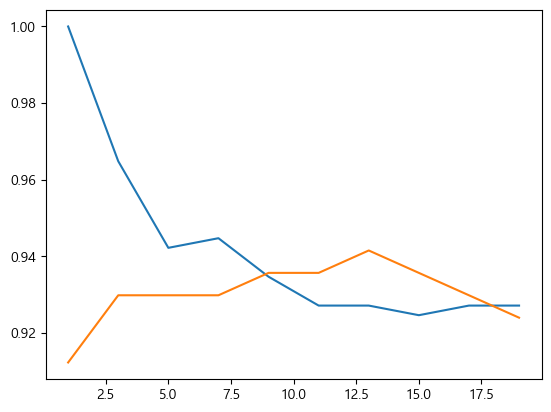

In [50]:
plt.plot(range(1,21,2), train_acc)
plt.plot(range(1,21,2), test_acc)

### 4) 신규 데이터 예측

In [51]:
new_data = pd.read_csv("data/new_data_classification_cancer.csv")
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              10 non-null     float64
 1   mean texture             10 non-null     float64
 2   mean perimeter           10 non-null     float64
 3   mean area                10 non-null     float64
 4   mean smoothness          10 non-null     float64
 5   mean compactness         10 non-null     float64
 6   mean concavity           10 non-null     float64
 7   mean concave points      10 non-null     float64
 8   mean symmetry            10 non-null     float64
 9   mean fractal dimension   10 non-null     float64
 10  radius error             10 non-null     float64
 11  texture error            10 non-null     float64
 12  perimeter error          10 non-null     float64
 13  area error               10 non-null     float64
 14  smoothness error         10 n

In [52]:
new_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,...,18.07,19.08,125.10,980.9,0.13900,0.5954,0.6305,0.23930,0.4667,0.09946
1,13.28,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,0.06782,...,17.38,28.00,113.10,907.2,0.15300,0.3724,0.3664,0.14920,0.3739,0.10270
2,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,24.22,31.59,156.10,1750.0,0.11900,0.3539,0.4098,0.15730,0.3689,0.08368
3,13.74,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.1824,0.1564,0.06019,0.2350,0.07014
4,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.50,1239.0,0.13810,0.3420,0.3508,0.19390,0.2928,0.07867


In [53]:
new_data_normed = scaler.transform(new_data)

In [54]:
pred1 = clf2.predict(new_data_normed)
pred1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['malignant', 'malignant', 'malignant', 'benign', 'malignant',
       'malignant', 'malignant', 'benign', 'benign', 'benign'],
      dtype=object)

## (3) 회귀 분석을 위한 KNN
- 분류를 위해 자주 사용되는 KNN이지만 회귀로도 사용할 수 있음
- https://subinium.github.io/MLwithPython-2-3-1/
- k-최근접 이웃 알고리즘은 회귀 분석에서도 쓰입니다. wave 데이터셋에서 사용해봅시다. 최근접 점이 1개일때는 가까운 데이터 포인트와 같은 값을 가지게 되는 것입니다.
- 여러 개의 최근접 모델에서는 이웃들의 평균을 사용하게 됩니다.(n_neighbors=3, 가장 가까운 3개의 평균)

In [66]:
import statsmodels .api as sm

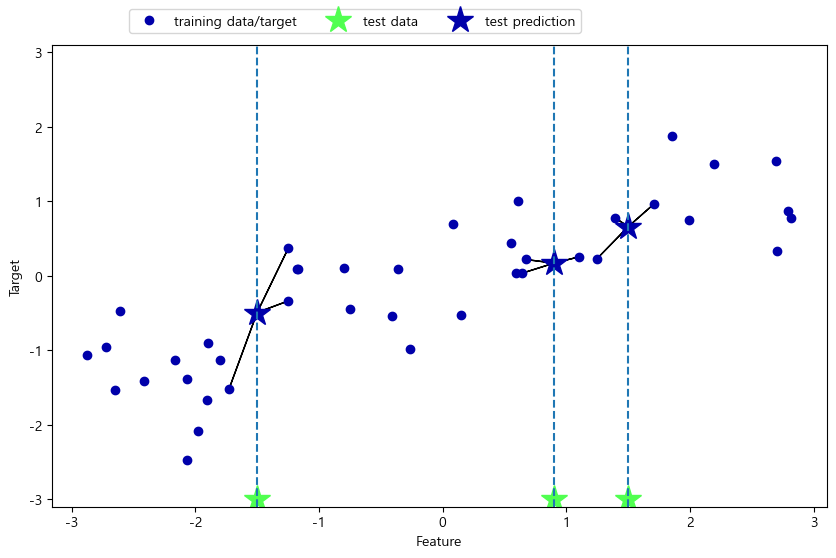

In [67]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [68]:
X, y = mglearn.datasets.make_wave(n_samples=40)

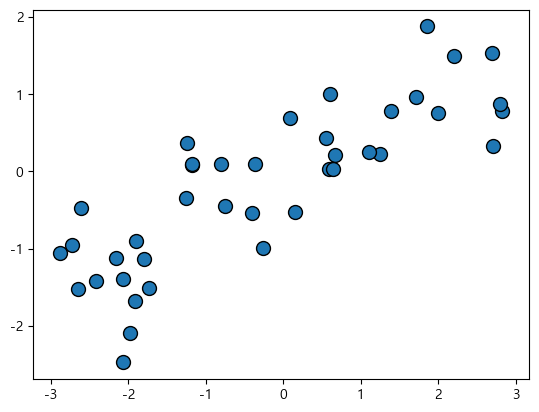

In [69]:
mglearn.discrete_scatter(X[:,0], y)

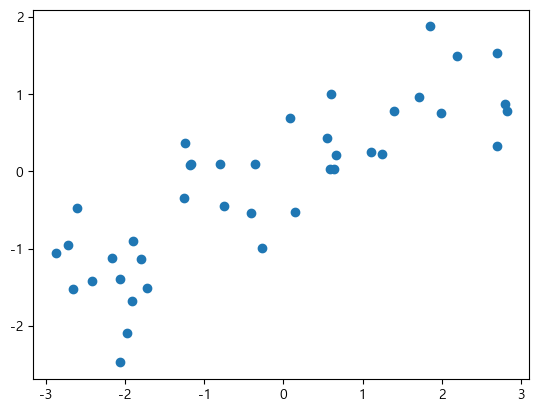

In [70]:
plt.scatter(X, y)

In [71]:
multi_model = sm.OLS(y, X).fit()
print(multi_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              87.82
Date:                Thu, 04 May 2023   Prob (F-statistic):                    1.56e-11
Time:                        16:35:23   Log-Likelihood:                         -34.631
No. Observations:                  40   AIC:                                      71.26
Df Residuals:                      39   BIC:                                      72.95
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [72]:
X_add = sm.add_constant(X)

multi_model = sm.OLS(y, X_add).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     82.86
Date:                Thu, 04 May 2023   Prob (F-statistic):           4.35e-11
Time:                        16:39:25   Log-Likelihood:                -34.403
No. Observations:                  40   AIC:                             72.81
Df Residuals:                      38   BIC:                             76.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0619      0.094     -0.660      0.5

In [73]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [74]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [75]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [76]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)
X_transformed = lab.fit_transform(X_train)

#view transformed values
print(y_transformed)
print(y)

print(X_transformed)
print(X)

[28 29 16  1  3 41 14 38  7 35  0  8 40 31 15  6 21 20 37 44 11 43 22 10
 24 13 32 12 26 34  9 30 25  2 18 23  5 17 39 42 19  4 33 27 36]
[-1.18073311  0.50015912  0.13772889  1.17396178 -1.32035898 -2.37364735
 -0.70117304  1.20319981  0.29262945  0.44971554 -0.48647165  1.39515571
  1.0738403  -1.30838148 -1.27708305 -0.94575843 -0.32691082  0.26134393
 -1.25635546 -0.74646948  0.96250584 -0.75240909 -0.17851354  0.13368988
 -0.38575444  0.79900059 -1.11948406  0.97923163  0.65823236 -0.08137001
 -0.72142625 -1.0767626  -0.83684971  0.70945882  0.95081838  0.38109799
 -0.19612826 -0.9139074   0.81263817 -0.93416482 -1.7113156  -0.32309571
 -0.44713127  1.19812891 -0.75150632  0.40012342 -0.02565504  0.77613985
  0.23938228 -1.58831973  0.73141352  0.25092544  1.01581268  1.28948157
  0.65213403  0.82614241 -1.7240941  -1.54664568 -1.03731593 -0.49131681]
[27 29  4  8 10 40 16 43  2 36  6 12 25 33 30 14 18 23 41 44  5 39 24  7
  3 15 42  9 34 26 22 37 20 13  0 17 21 19 31 38  1 11 28 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
a = range(1, 15)
nn = [ num *1 for num in a if num % 2 == 1]
for i in nn:
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train, y_train)
    
    print("n_neighbors : ", i)
    print("train.score : ", reg.score(X_train, y_train))
    print("test.score : ", reg.score(X_test, y_test))
    print("--------------------")

n_neighbors :  1
train.score :  1.0
test.score :  0.3519867415115093
--------------------
n_neighbors :  3
train.score :  0.8194343929538755
test.score :  0.8344172446249605
--------------------
n_neighbors :  5
train.score :  0.7933627228318063
test.score :  0.707138114401173
--------------------
n_neighbors :  7
train.score :  0.787192898001129
test.score :  0.6752134587675717
--------------------
n_neighbors :  9
train.score :  0.7283986168755594
test.score :  0.6541236379533191
--------------------
n_neighbors :  11
train.score :  0.6972434174127736
test.score :  0.6989374099426371
--------------------
n_neighbors :  13
train.score :  0.6313956123358728
test.score :  0.6911059364120702
--------------------


In [20]:
reg = KNeighborsRegressor(n_neighbors=1)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

1.0
0.3519867415115093


In [27]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.8914454497082948
0.24379975152085331


In [23]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.7933627228318063
0.707138114401173


In [34]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=9)
reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.7283986168755594
0.6541236379533191


In [35]:
X_test, y_test

(array([[-1.24713211],
        [ 0.67111737],
        [ 1.71105577],
        [-2.06388816],
        [-2.87649303],
        [-1.89957294],
        [ 0.55448741],
        [ 2.81945911],
        [-0.40832989],
        [-2.72129752]]),
 array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
        -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133]))

In [36]:
reg.predict([[-1.25262516]])

array([-0.76885025])

In [37]:
reg.predict(X_test)

array([-0.76885025,  0.16870118,  0.81020743, -1.49113268, -1.49113268,
       -1.35931037,  0.16870118,  0.90283566, -0.13712298, -1.49113268])

In [44]:
import matplotlib.pyplot as plt

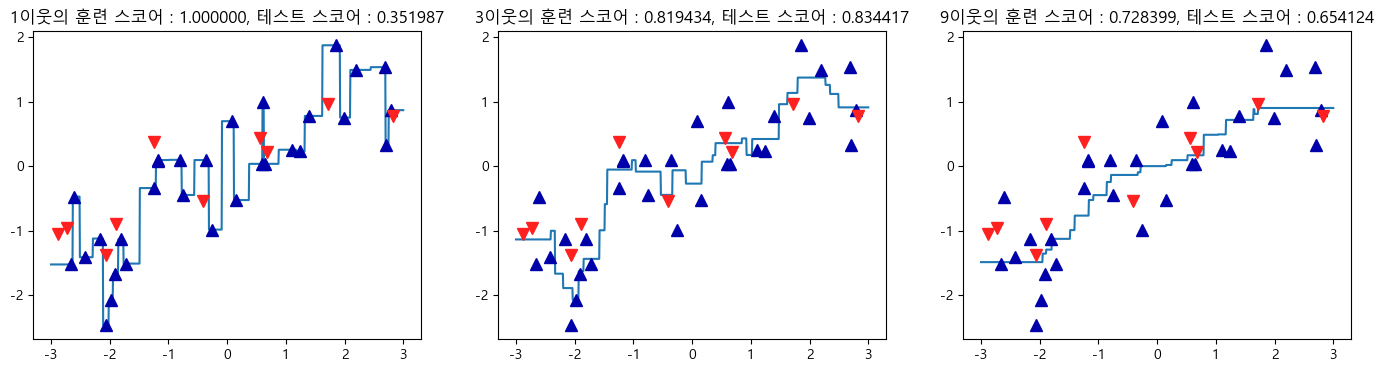

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0}이웃의 훈련 스코어 : {1:2f}, 테스트 스코어 : {2:2f}".format(n, 
                                                                   reg.score(X_train, y_train),
                                                                  reg.score(X_test, y_test)))

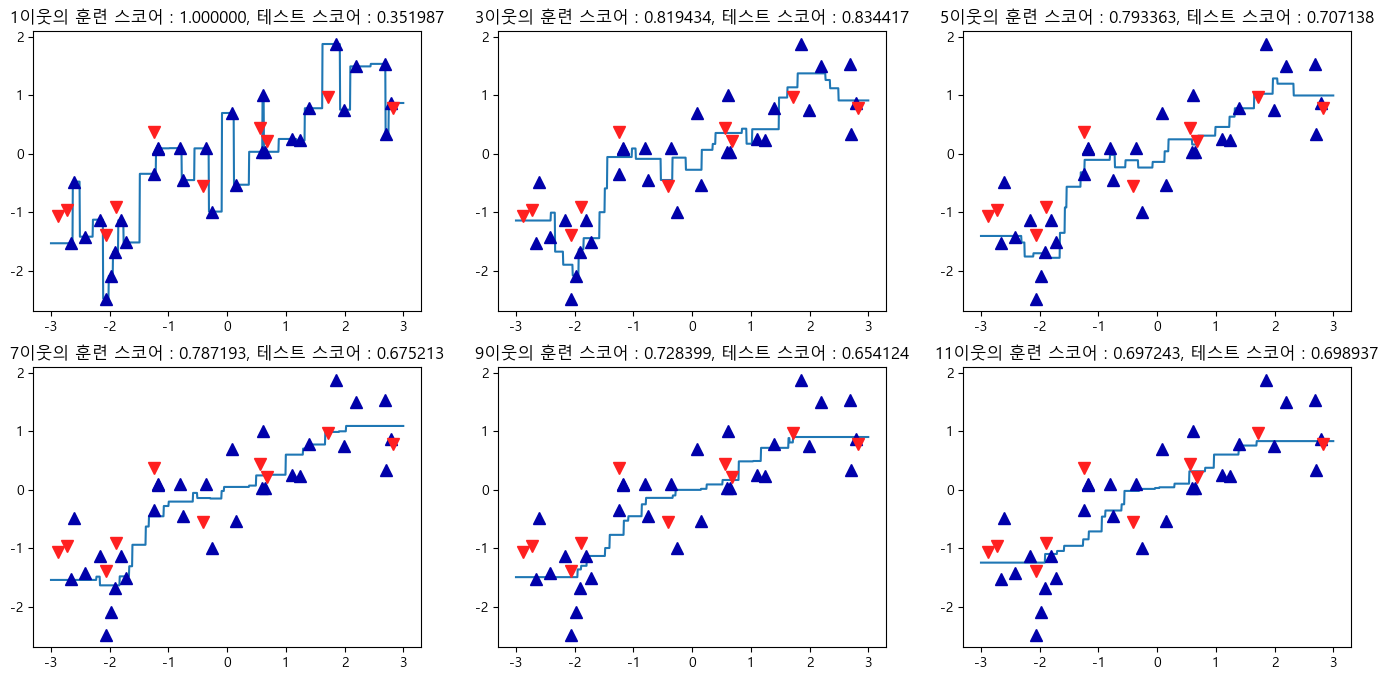

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(17, 8))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n, ax in zip([1, 3, 5, 7, 9, 11], axes.ravel()):
    reg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0}이웃의 훈련 스코어 : {1:2f}, 테스트 스코어 : {2:2f}".format(n, 
                                                                   reg.score(X_train, y_train),
                                                                  reg.score(X_test, y_test)))

## (4) 다중분류

In [53]:
iris = load_iris()

In [82]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [83]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
iris.data
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

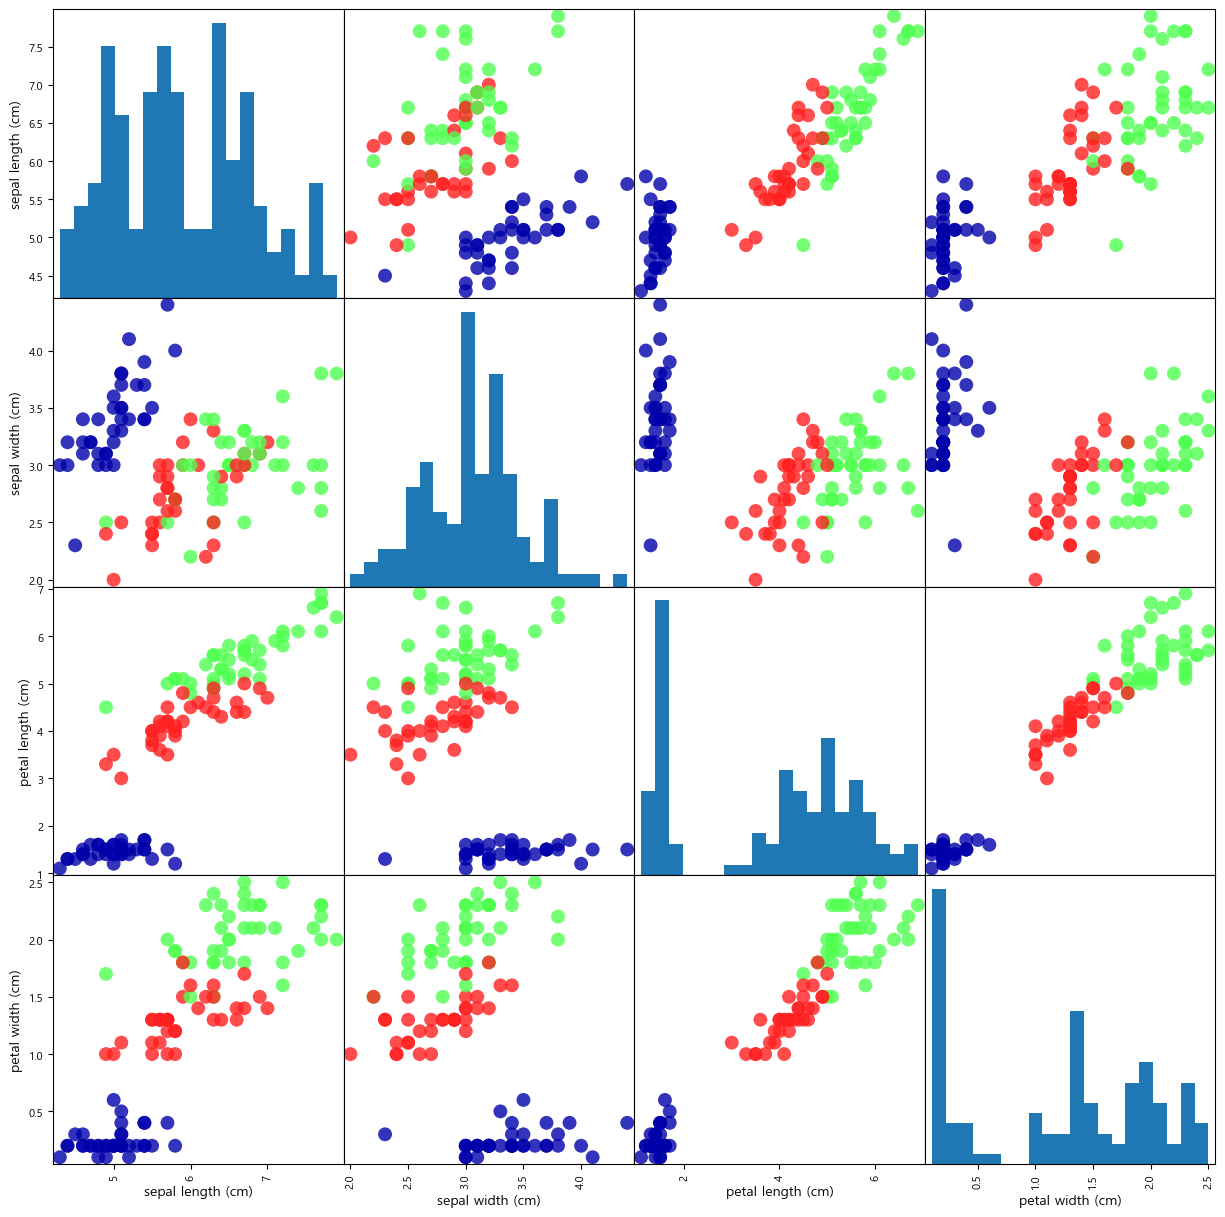

In [65]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df

pd.plotting.scatter_matrix(iris_df, figsize = (15, 15), c=y_train, s = 100, marker = 'o', cmap = mglearn.cm3, hist_kwds={"bins" : 20}, alpha = 0.8)

In [67]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [68]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9642857142857143
0.9736842105263158


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [72]:
pred = knn.predict(X_test)
print(pred)
print(y_test)

np.mean(pred == y_test)
# 분류에서의 score는 정답과의 일치율 평균
# 회귀에서의 score는 설명률

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9736842105263158

In [84]:
# 꽃받침(Sepla)의 길이가 5cm, 폭은 2.9cm,
# 꽃잎(Petal)의 길이는 1cm,폭은 0.2cm인 붓꽃의 품종은?
# 훈련받은 순서대로 데이터를 넣어준다
# predict로 넘겨주고 데이터는 2차원배열로 넘겨준다

pred = knn.predict([[5.0, 2.9, 1.0, 0.2]])
print("결과는 :", iris.target_names[pred])


결과는 : ['setosa']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## (5) 영화 분류 프로그램


In [123]:
import operator

def createDataset():
    group = [[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]]
    label = ["Action", "Action", "Romance", "Romance"]
    return group, label

def classify(X_new, X, y, k):
    ## 거리 측정
    diffMat = np.array(X_new) - np.array(X)
    #print(diffMat)
    
    ## L2 norm
    sqDiffMat = diffMat **2
    distance = (sqDiffMat.sum(axis=1))**0.5
    #print(distance)
    
    # 이웃의 갯수로 묶어 해당 클래스로 분류
    classCount = {}
    
    sort_distance = distance.argsort() # 
    #print(sort_distance)
    
    for i in range(k):
        voteLabel = y[sort_distance[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1 # 0은 classCount에 아무런 값이 없어서 넣어줘야함
    #print(classCount)
    #return classCount # dict형식을 정렬해보자  #import operator + sorted(dict.items(), key=operator.itemgetter())
    #key=operator.itemgetter(1)
    #return sorted(classCount.items(), key=operator.itemgetter(0)) # key값으로 정렬 # 여기선 알파벳순으로
    #return sorted(classCount.items(), key=operator.itemgetter(1)) # value값으로 정렬 # 오름차순
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True) # value값 정렬 # 내림차순

In [126]:
X, y = createDataset()
print(X, y)

result = classify([2.0, 3.0], X, y, 3) # 3은 이웃의 갯수
print("결과는 {}이다.".format(result))
print("결과는 {}이다.".format(result[0]))
print("결과는 {}이다.".format(result[0][0]))

[[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]] ['Action', 'Action', 'Romance', 'Romance']
결과는 [('Action', 2), ('Romance', 1)]이다.
결과는 ('Action', 2)이다.
결과는 Action이다.


In [94]:
import math

group = [[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]]
target = [2.0, 3.0]

# 각 그룹과 target 간의 유클리드 거리를 계산합니다.
distances = [math.sqrt((coord[0]-target[0])**2 + (coord[1]-target[1])**2) for coord in group]

print(distances)

[1.4142135623730951, 1.4142135623730951, 2.8284271247461903, 2.23606797749979]


# 4. 검증(Validation)

- test로 넘어가기 전 train 단계에서 임의의 단위당 test와 train을 거치는 방식(10%는 test, 90%는 훈련으로 10바퀴 등)
- Cross Validation
- K Fold 방식

In [127]:
from sklearn.model_selection import KFold

In [128]:
iris = load_iris()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [198]:
print(X_train.shape)

kf = KFold(n_splits=10) # KFold(n_splits= ?) 몇등분으로 나눠줄 것이냐
#kf.split(X_train)
list(kf.split(X_train))

(112, 4)


[(array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
          25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
          38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
          51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
          64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
          77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
          90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
         103, 104, 105, 106, 107, 108, 109, 110, 111]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  24,
          25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
          38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
          51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
          64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  

In [199]:
# test데이터는 건드리지 않고 훈련 데이터 내에서만 재구성
knn = KNeighborsClassifier(n_neighbors=3)
cv_acc = []

for train_index, test_index in kf.split(X_train):
    #print(test_index)
    X_train1, X_test1 = X_train[train_index], X_train[test_index]
    y_train1, y_test1 = y_train[train_index], y_train[test_index]
    #print(X_train1.shape, X_test1.shape)
    
    knn.fit(X_train1, y_train1)
    
    #cv_acc.append(knn.score(X_test1, y_test1))
    
    #accuracy_score # from sklearn.metrics import accuracy_score
    pred = knn.predict(X_test1)
    
    cv_acc.append(accuracy_score(y_test1, pred))
    #cv_acc.append(accuracy_scpre(정답데이터, 예측값))
    

In [200]:
print(cv_acc)
print(np.mean(cv_acc))

[0.9166666666666666, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8181818181818182, 0.9090909090909091]
0.9477272727272726


In [201]:
print(knn.score(X_test, y_test))

0.9736842105263158


In [202]:
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))
# 2개의 값이 같다

0.9736842105263158


## (1) Stratified K fold

- 데이터의 갯수가 불균형할 때

In [177]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

iris_df["label"] = iris.target

In [178]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [185]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3)

for train_idx, test_idx, in kf.split(iris_df, iris_df["label"]):
    label_train = iris_df["label"].iloc[train_idx]
    label_test = iris_df["label"].iloc[test_idx]
    
    print("훈련 데이터 : \n", label_train.value_counts())
    print("테스트 데이터 : \n", label_test.value_counts())
    print("-----------------------------------------")

훈련 데이터 : 
 2    34
0    33
1    33
Name: label, dtype: int64
테스트 데이터 : 
 0    17
1    17
2    16
Name: label, dtype: int64
-----------------------------------------
훈련 데이터 : 
 1    34
0    33
2    33
Name: label, dtype: int64
테스트 데이터 : 
 0    17
2    17
1    16
Name: label, dtype: int64
-----------------------------------------
훈련 데이터 : 
 0    34
1    33
2    33
Name: label, dtype: int64
테스트 데이터 : 
 1    17
2    17
0    16
Name: label, dtype: int64
-----------------------------------------


- 훈련은 1번과 2번으로 했는데 테스트는 0번으로 하는 등, 종별로 전혀 섞이지 않았다.

## (2) cross_val_score(), cross_validate()
- 평가지표가 1개(ex.정확도)일 때 : cross_val_score()
- 평가지표가 여러개일 때 : cross_validate()

In [203]:
knn = KNeighborsClassifier(n_neighbors=3)

In [204]:
scores = cross_val_score(knn, X_train, y_train, scoring="accuracy", cv=10)

In [205]:
print(scores)
print(scores.mean())

[1.         0.91666667 0.90909091 1.         1.         1.
 1.         0.81818182 1.         0.90909091]
0.9553030303030303


## (3) 검증과 튜닝을 동시에

- 교차 검증과 최적의 하이퍼 파라미터 튜닝을 한 번에 처리
- GridSearchCV()
- RandomSearchCV()

### 1) GridSearchCV()

In [ ]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)

In [216]:
#?GridSearchCV
params = {"n_neighbors" : [1,3,5,7,9,11]}

grid_knn = GridSearchCV(knn, params, cv= 5)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [217]:
pred = grid_knn.predict(X_test)
accuracy_score(y_test, pred)

0.9736842105263158

In [218]:
dir(grid_knn)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [219]:
grid_knn.cv_results_

{'mean_fit_time': array([0.00021353, 0.00020151, 0.00019946, 0.00019965, 0.00019946,
        0.        ]),
 'std_fit_time': array([0.00042706, 0.00040302, 0.00039892, 0.0003993 , 0.00039892,
        0.        ]),
 'mean_score_time': array([0.00099659, 0.00099559, 0.00097089, 0.00099831, 0.0006072 ,
        0.00235882]),
 'std_score_time': array([6.50110293e-04, 3.09540412e-06, 5.92581911e-04, 1.64076333e-06,
        4.95879269e-04, 4.71763611e-03]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.95652174, 0.95652174, 1.        , 1.        , 1.        ,
        1.        ]),
 'split1_test_score': array([0.91304348, 0.91304348, 0.95652174, 0.95652174, 0.95652174,
        0.95652174]),
 'sp

In [221]:
score_df = pd.DataFrame(grid_knn.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000214,0.000427,0.000997,0.000650,1,{'n_neighbors': 1},0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,5
1,0.000202,0.000403,0.000996,0.000003,3,{'n_neighbors': 3},0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,5
2,0.000199,0.000399,0.000971,0.000593,5,{'n_neighbors': 5},1.000000,0.956522,0.954545,0.863636,1.000000,0.954941,0.049799,4
3,0.000200,0.000399,0.000998,0.000002,7,{'n_neighbors': 7},1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,1
4,0.000199,0.000399,0.000607,0.000496,9,{'n_neighbors': 9},1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,1
5,0.000000,0.000000,0.002359,0.004718,11,{'n_neighbors': 11},1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,1


In [222]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'n_neighbors': 7}
0.9640316205533598


### (2) RandomizedSearchCV()

In [226]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

knn = KNeighborsClassifier(n_neighbors=3)

In [227]:
from scipy.stats import randint, uniform

params = {"n_neighbors" : randint(low=1, high=9)}

random_knn = RandomizedSearchCV(knn, params, cv= 5, n_iter = 10)

random_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6DF79CCD0>})

In [228]:
pred = random_knn.predict(X_test)
accuracy_score(y_test, pred)

0.9736842105263158

In [232]:
score_df = pd.DataFrame(random_knn.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000200,0.000399,0.001395,0.000487,8,{'n_neighbors': 8},1.000000,0.913043,1.000000,0.863636,0.954545,0.946245,0.052487,9
1,0.000405,0.000496,0.000786,0.000394,5,{'n_neighbors': 5},1.000000,0.956522,0.954545,0.863636,1.000000,0.954941,0.049799,2
2,0.000198,0.000397,0.001149,0.000299,3,{'n_neighbors': 3},0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,5
3,0.000394,0.000483,0.000531,0.000455,4,{'n_neighbors': 4},0.956522,0.913043,1.000000,0.863636,1.000000,0.946640,0.052556,5
4,0.000000,0.000000,0.000000,0.000000,5,{'n_neighbors': 5},1.000000,0.956522,0.954545,0.863636,1.000000,0.954941,0.049799,2
5,0.000204,0.000408,0.003059,0.004454,8,{'n_neighbors': 8},1.000000,0.913043,1.000000,0.863636,0.954545,0.946245,0.052487,9
6,0.000000,0.000000,0.000000,0.000000,5,{'n_neighbors': 5},1.000000,0.956522,0.954545,0.863636,1.000000,0.954941,0.049799,2
7,0.000414,0.000507,0.003050,0.004110,4,{'n_neighbors': 4},0.956522,0.913043,1.000000,0.863636,1.000000,0.946640,0.052556,5
8,0.000200,0.000399,0.000797,0.000398,6,{'n_neighbors': 6},1.000000,0.956522,1.000000,0.863636,1.000000,0.964032,0.052947,1
9,0.000199,0.000399,0.001210,0.000395,4,{'n_neighbors': 4},0.956522,0.913043,1.000000,0.863636,1.000000,0.946640,0.052556,5


In [231]:
print(random_knn.best_params_)
print(random_knn.best_score_)

{'n_neighbors': 6}
0.9640316205533598
